A comparison of Illumina short read and ONT long reads using gene counts: <br>
I used BWA to align long reads to the transcriptome as per the Brooks dry lab protocols to quantify genes. <br>
I used HTSeq-count on HISAT-aligned Anczukow bam files to get gene counts.

In [2]:
setwd('~/bme')
# nanopore runs
control.11 = read.table('SOULETTE_PWZL_R1_T1_11232016_2D_PASS.counts', header=T)  # technical replicates, PWZL
control.12 = read.table('SOULETTE_PWZL_R1_T2_11232016_2D_PASS.counts', header=T)  # technical replicates, PWZL
control.21 = read.table('SOULETTE_PWZL_R2_T1_11292016_2D_PASS.counts', header=T)
srsf1.11 = read.table('SOULETTE_SRSF1_R1_T1_11152016_2D_PASS.counts', header=T)  # technical replicates, SRSF1oe
srsf1.12 = read.table('SOULETTE_SRSF1_R1_T2_11152016_2D_PASS.counts', header=T)  # technical replicates, SRSF1oe
srsf1.21 = read.table('SOULETTE_SRSF1_R2_T1_11292016_2D_PASS.counts', header=T)

# illumina runs
srsf1_2d = read.table('SRR2175475_srsf1.genenames.counts')
pwzl_2d = read.table('SRR2175474_srsf1.genenames.counts')

# kallisto est gene length
kallisto = read.table('abundance.v26.txt')

In [3]:
control.11$gene = as.character(control.11$gene)
control.12$gene = as.character(control.12$gene)
control.21$gene = as.character(control.21$gene)
srsf1.11$gene = as.character(srsf1.11$gene)
srsf1.12$gene = as.character(srsf1.12$gene)
srsf1.21$gene = as.character(srsf1.21$gene)
srsf1_2d$V1 = as.character(srsf1_2d$V1)
pwzl_2d$V1 = as.character(pwzl_2d$V1)
all_genes = unique(c(control.11$gene,control.12$gene,control.21$gene,srsf1.11$gene,srsf1.12$gene,srsf1.21$gene,
                    srsf1_2d$V1, pwzl_2d))
all_srsf1 = data.frame(control.11=control.11[,3][match(all_genes, control.11$gene)],
                      control.12=control.12[,3][match(all_genes, control.12$gene)],
                      control.21=control.21[,3][match(all_genes, control.21$gene)],
                      srsf1.11=srsf1.11[,3][match(all_genes, srsf1.11$gene)],
                      srsf1.12=srsf1.12[,3][match(all_genes, srsf1.12$gene)],
                      srsf1.21=srsf1.21[,3][match(all_genes, srsf1.21$gene)],
                      srsf1_2d=srsf1_2d$V2[match(all_genes, srsf1_2d$V1)],
                      pwzl_2d=pwzl_2d$V2[match(all_genes, srsf1_2d$V1)],
                      est.lengths=kallisto$V7[match(all_genes, as.character(kallisto$V3))], row.names=all_genes)
temp = all_srsf1
temp[is.na(temp <- all_srsf1)] <- 0
all_srsf1 = temp
all_srsf1 = all_srsf1[rowSums(all_srsf1) != 0,]
head(all_srsf1)

,control.11,control.12,control.21,srsf1.11,srsf1.12,srsf1.21,srsf1_2d,pwzl_2d,est.lengths
UBE2Q1,2,0,0,0,0,0,801,1315,2908.2457
RNF14,1,1,1,0,0,1,0,9,2881.3267
RNF10,4,3,0,0,0,0,1318,1919,2853.6254
FGFR1OP2,2,1,0,1,0,1,1,1,2298.7562
MZT2A,2,0,3,3,2,3,0,0,905.7335
MZT2B,2,2,4,5,8,6,0,0,625.2565


I divided the short read counts by estimated gene lengths from another kallisto run with SF3B1 data. I should check that the gene lengths aren't dependent on the expression data or else I might have to rerun this.
<br>
'A' shows that long read gene counts from biological or technical replicates correlate well.
<br>
If you compare short and long read count correlations, combining the data does slightly better. Comparing B with D with E and C with F with G.

In [90]:
all_srsf1$srsf1_2d_norm = all_srsf1$srsf1_2d / all_srsf1$est.lengths
all_srsf1$pwzl_2d_norm = all_srsf1$pwzl_2d / all_srsf1$est.lengths
# all_srsf1 = all_srsf1[all_srsf1$est.lengths != 0,]
c('A',cor(all_srsf1$control.11, all_srsf1$control.12), cor(all_srsf1$control.11, all_srsf1$control.21))  # long vs long
c('B',cor(all_srsf1$control.11, all_srsf1$pwzl_2d_norm), cor(all_srsf1$control.12, all_srsf1$pwzl_2d_norm), 
  cor(all_srsf1$control.21, all_srsf1$pwzl_2d_norm))  # PWZL controls: each PWZL replicate long vs short
c('C',cor(all_srsf1$srsf1.11, all_srsf1$srsf1_2d_norm), cor(all_srsf1$srsf1.12, all_srsf1$srsf1_2d_norm), 
  cor(all_srsf1$srsf1.21, all_srsf1$srsf1_2d_norm))  # SRSF1: each SRSF1 oe replicate long vs short

c('D',cor(all_srsf1$control.11 + all_srsf1$control.12, all_srsf1$pwzl_2d_norm))  # combined PWZL technical reps long vs short
c('E',cor(all_srsf1$control.11 + all_srsf1$control.12 + all_srsf1$control.21, all_srsf1$pwzl_2d_norm))  # combined all PWZL long 
c('F',cor(all_srsf1$srsf1.11 + all_srsf1$srsf1.12, all_srsf1$srsf1_2d_norm))  # combined SRSF1 technical reps long vs short
c('G',cor(all_srsf1$srsf1.11 + all_srsf1$srsf1.12 + all_srsf1$srsf1.21, all_srsf1$srsf1_2d_norm))  # combined all SRSF1 long

[1] "A"                 "0.978993735598005" "0.984915559491103"

[1] "B"                 "0.254898755821445" "0.249915977655438"
[4] "0.269249618265281"

[1] "C"                 "0.184205152257959" "0.192683514919225"
[4] "0.197167195944175"

[1] "D"                 "0.254372208676718"

[1] "E"                "0.26115139146319"

[1] "F"                 "0.190014585813455"

[1] "G"                 "0.194276019038903"

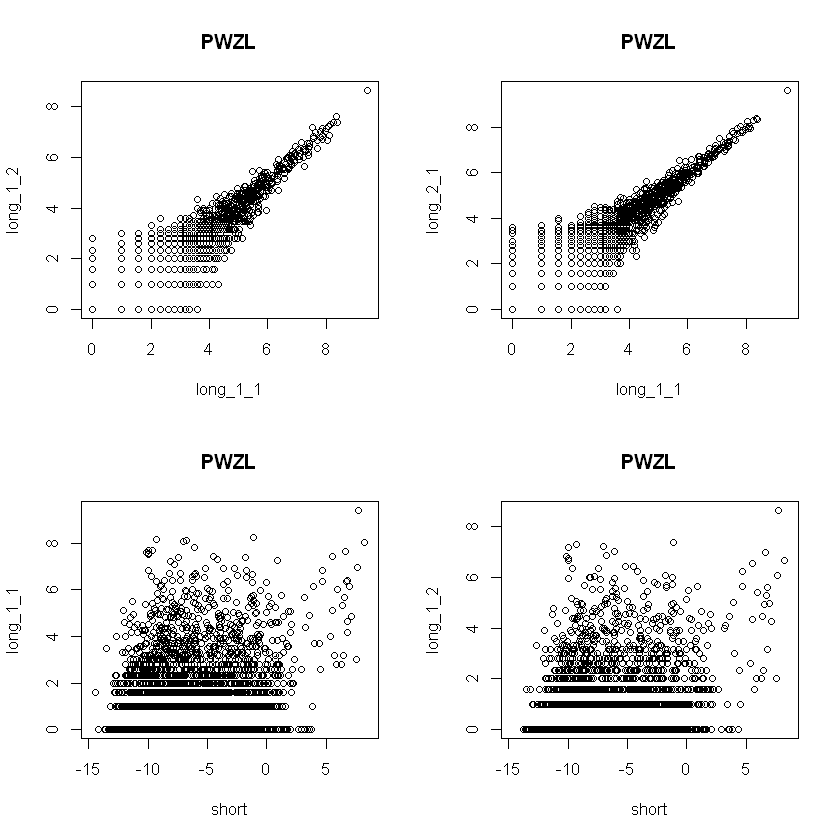

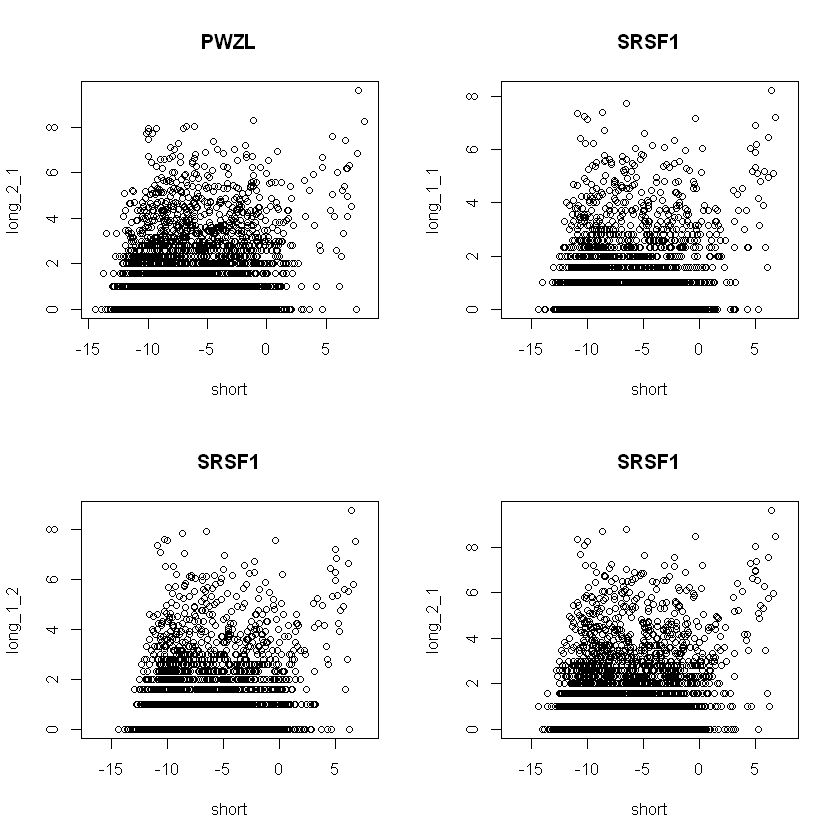

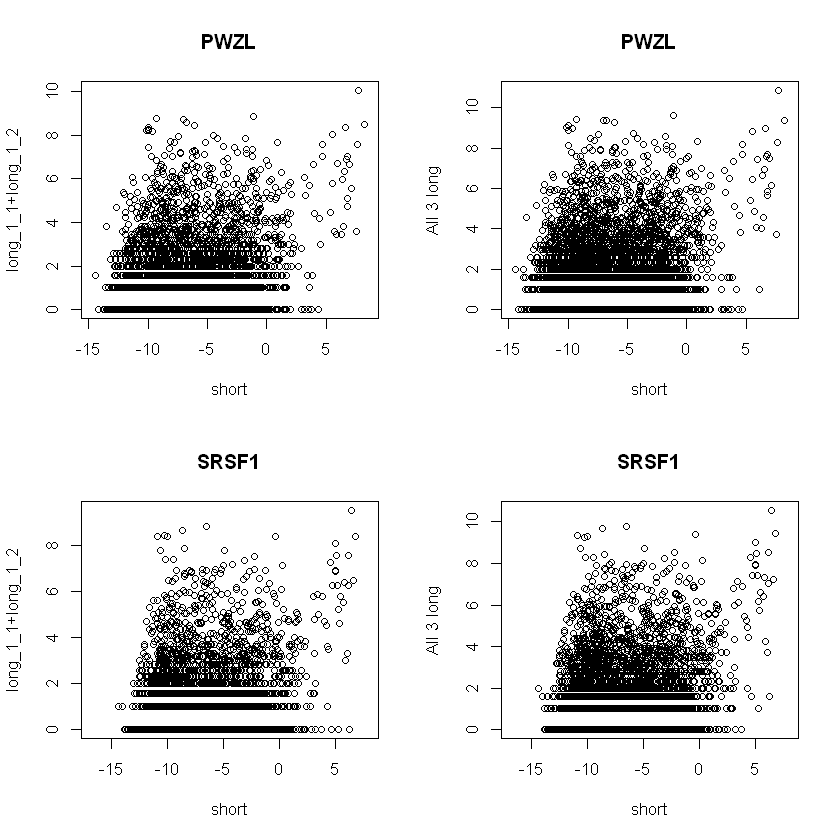

In [88]:
options(warn=-1)
# attach(mtcars)
par(mfrow=c(2,2))

plot(log2(all_srsf1$control.11), log2(all_srsf1$control.12), xlab='long_1_1', ylab='long_1_2', main='PWZL')
# text(x=1, labels=paste0('Cor = ', cor(all_srsf1$control.11, all_srsf1$control.12)))
plot(log2(all_srsf1$control.11), log2(all_srsf1$control.21), xlab='long_1_1', ylab='long_2_1', main='PWZL')
plot(log2(all_srsf1$pwzl_2d_norm), log2(all_srsf1$control.11), xlab='short', ylab='long_1_1', main='PWZL')
plot(log2(all_srsf1$pwzl_2d_norm), log2(all_srsf1$control.12), xlab='short', ylab='long_1_2', main='PWZL')
plot(log2(all_srsf1$pwzl_2d_norm), log2(all_srsf1$control.21), xlab='short', ylab='long_2_1', main='PWZL')
plot(log2(all_srsf1$srsf1_2d_norm), log2(all_srsf1$srsf1.11), xlab='short', ylab='long_1_1', main='SRSF1')
plot(log2(all_srsf1$srsf1_2d_norm), log2(all_srsf1$srsf1.12), xlab='short', ylab='long_1_2', main='SRSF1')
plot(log2(all_srsf1$srsf1_2d_norm), log2(all_srsf1$srsf1.21), xlab='short', ylab='long_2_1', main='SRSF1')

plot(log2(all_srsf1$pwzl_2d_norm), log2(all_srsf1$control.11 + all_srsf1$control.12), 
     xlab='short', ylab='long_1_1+long_1_2', main='PWZL')
plot(log2(all_srsf1$pwzl_2d_norm), log2(all_srsf1$control.11 + all_srsf1$control.12 + all_srsf1$control.21), 
     xlab='short', ylab='All 3 long', main='PWZL')
plot(log2(all_srsf1$srsf1_2d_norm), log2(all_srsf1$srsf1.11 + all_srsf1$srsf1.12), 
     xlab='short', ylab='long_1_1+long_1_2', main='SRSF1')
plot(log2(all_srsf1$srsf1_2d_norm), log2(all_srsf1$srsf1.11 + all_srsf1$srsf1.12 + all_srsf1$srsf1.21),
     xlab='short', ylab='All 3 long', main='SRSF1')